EXPLORATORY DATA ANALYSIS

Task 4: Finding out hot zone for terrorism

Author : Aishwarya M

In [3]:
#Importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.get_option('display.max_columns')

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('globalterrorismdb_0718dist.csv' , encoding = 'windows 1252')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe(include = 'all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [8]:
df.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [16]:
print('Damaged property value: ',df['propvalue'].sum())

Damaged property value:  8141365949.80988


In [15]:
print('Ransom paid:',df['ransompaid'].sum())

Ransom paid: 555688424.95


In [14]:
print('No. of Suicides:',df['suicide'].sum())

No. of Suicides: 6633


In [13]:
print('No. of people wounded:',df['nwound'].sum())

No. of people wounded: 523869.0


In [17]:
print('No. of people killed:',df['nkill'].sum())

No. of people killed: 411868.0


Yearwise terrorist attacks:


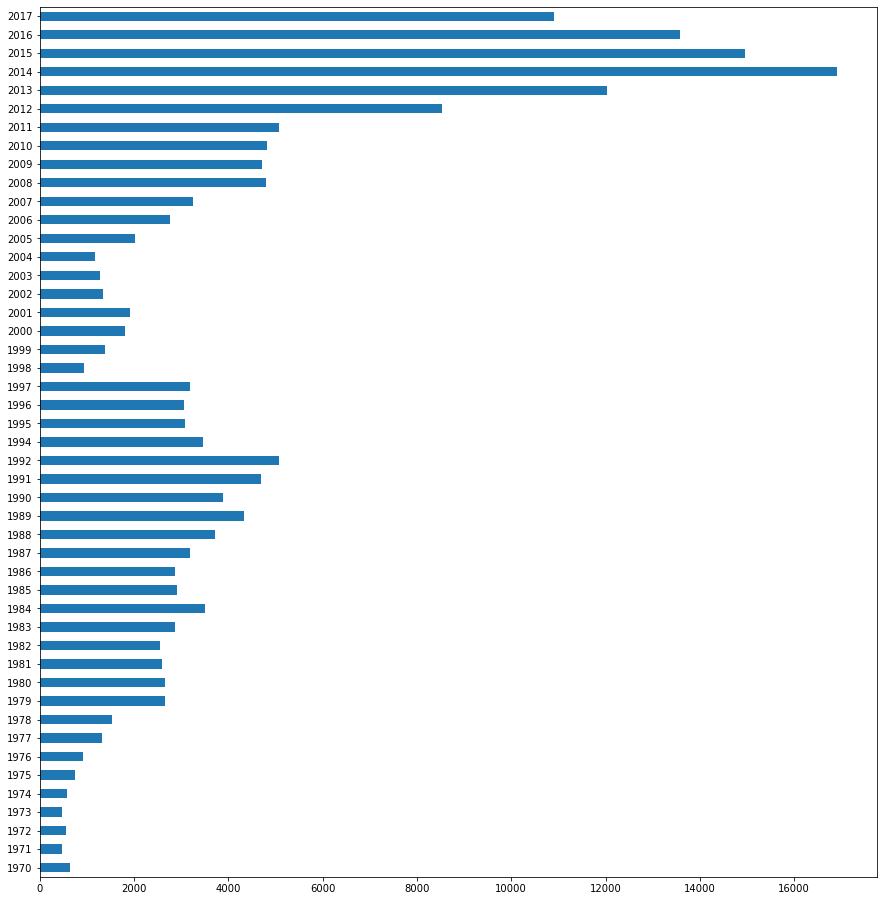

In [20]:
print('Yearwise terrorist attacks:')
df.iyear.value_counts().sort_index().plot(kind = 'barh',figsize = (15,16))
plt.show()

hostkidoutcome_txt:


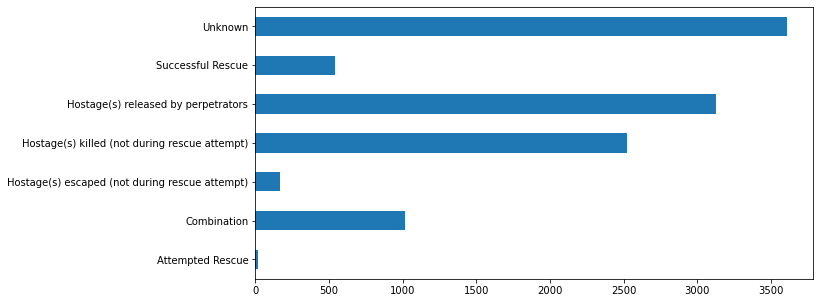

In [22]:
print('hostkidoutcome_txt:')
df['hostkidoutcome_txt'].value_counts().sort_index().plot(kind = 'barh',figsize = (10,5))
plt.show()

Extent of the property:


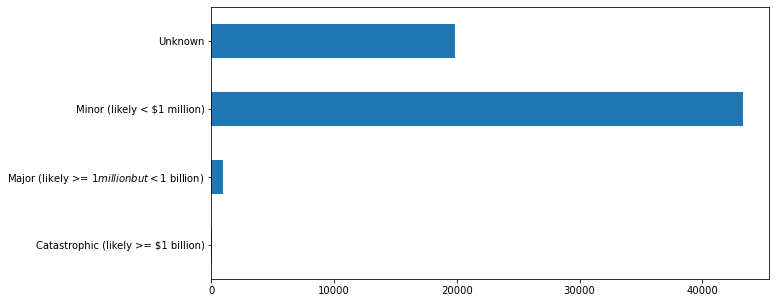

In [23]:
print('Extent of the property:')
df['propextent_txt'].value_counts().sort_index().plot(kind = 'barh',figsize = (10,5))
plt.show()

attacktype1_txt :


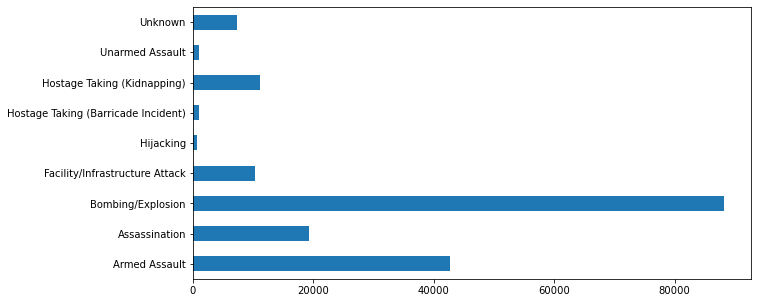

attacktype2_txt :


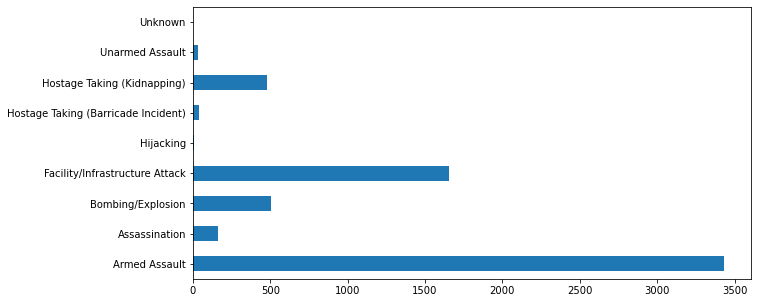

attacktype3_txt :


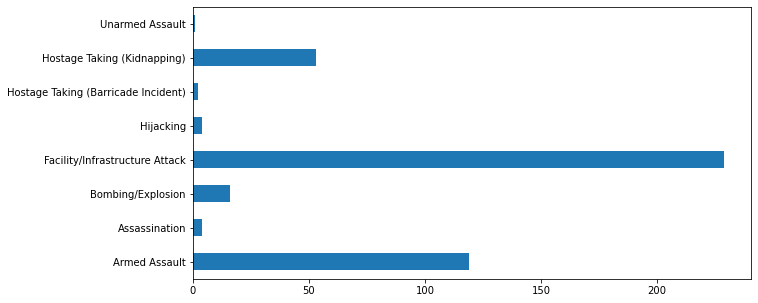

In [25]:
attack =['attacktype1_txt','attacktype2_txt','attacktype3_txt']
for i in attack:
    print(i,':')
    df[i].value_counts().sort_index().plot(kind = 'barh',figsize = (10,5))
    plt.show()

targtype1_txt :


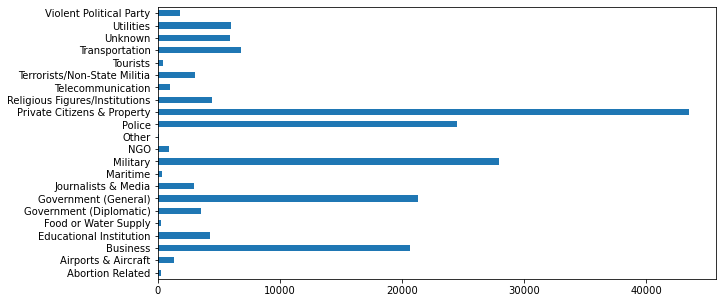

targtype2_txt :


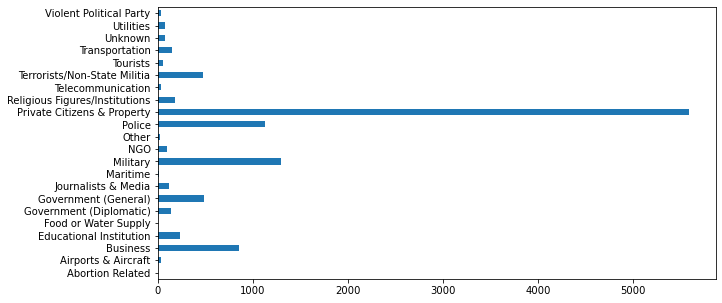

targtype3_txt :


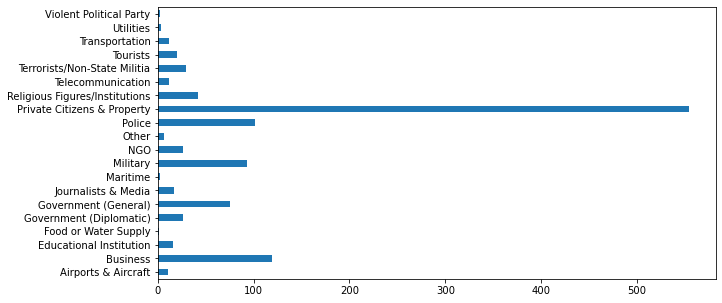

In [26]:
targ =['targtype1_txt','targtype2_txt','targtype3_txt']
for i in targ:
    print(i,':')
    df[i].value_counts().sort_index().plot(kind = 'barh',figsize = (10,5))
    plt.show()

weaptype1_txt :


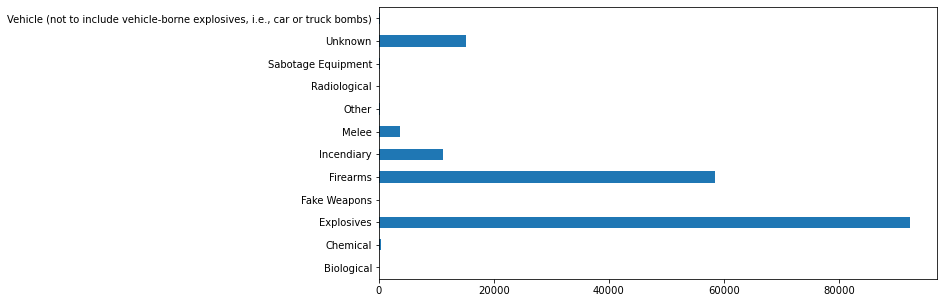

weaptype2_txt :


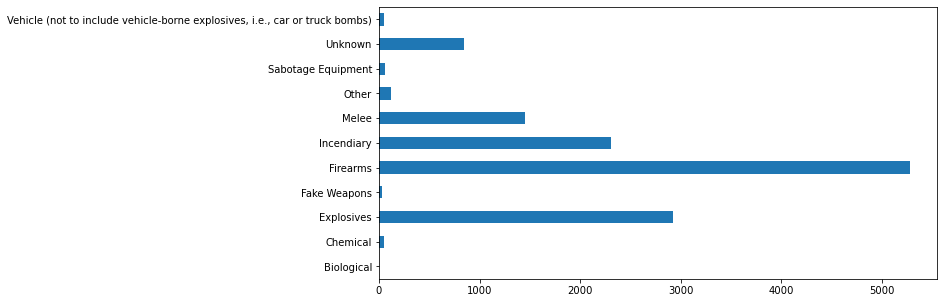

weaptype3_txt :


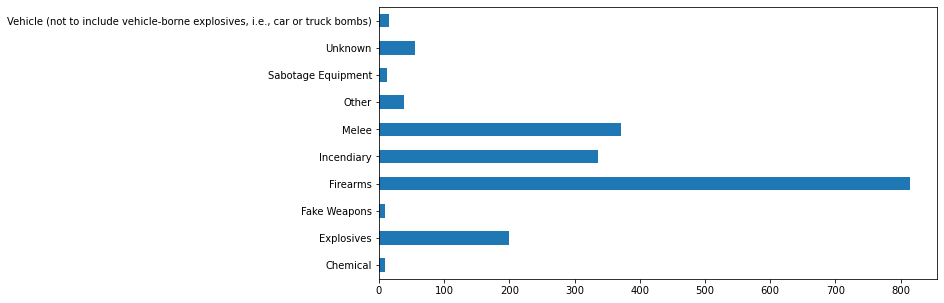

In [28]:
weap =['weaptype1_txt','weaptype2_txt','weaptype3_txt']
for i in weap:
    print(i,':')
    df[i].value_counts().sort_index().plot(kind = 'barh',figsize = (10,5))
    plt.show()

claimmode_txt :


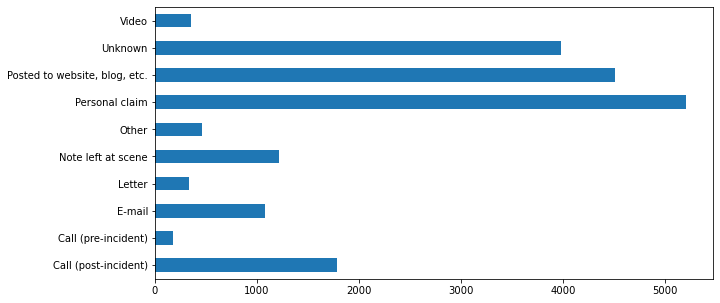

claimmode2_txt :


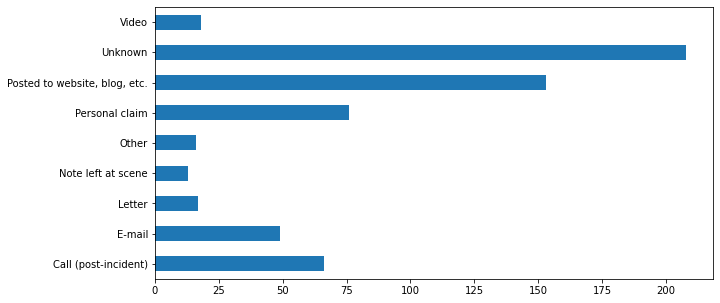

claimmode3_txt :


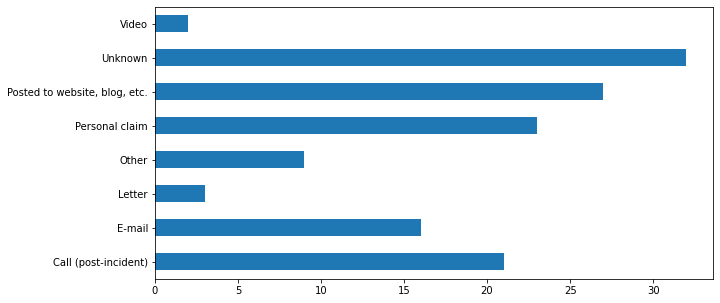

In [29]:
claim =['claimmode_txt','claimmode2_txt','claimmode3_txt']
for i in claim:
    print(i,':')
    df[i].value_counts().sort_index().plot(kind = 'barh',figsize = (10,5))
    plt.show()

In [31]:
df_country = df.country_txt.value_counts().reset_index().rename({'index': 'country', 'country_txt': 'count'},axis=1)
df_country.head()

,country,count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


Top 30 terrorist attacked countries:


<AxesSubplot:xlabel='count', ylabel='country'>

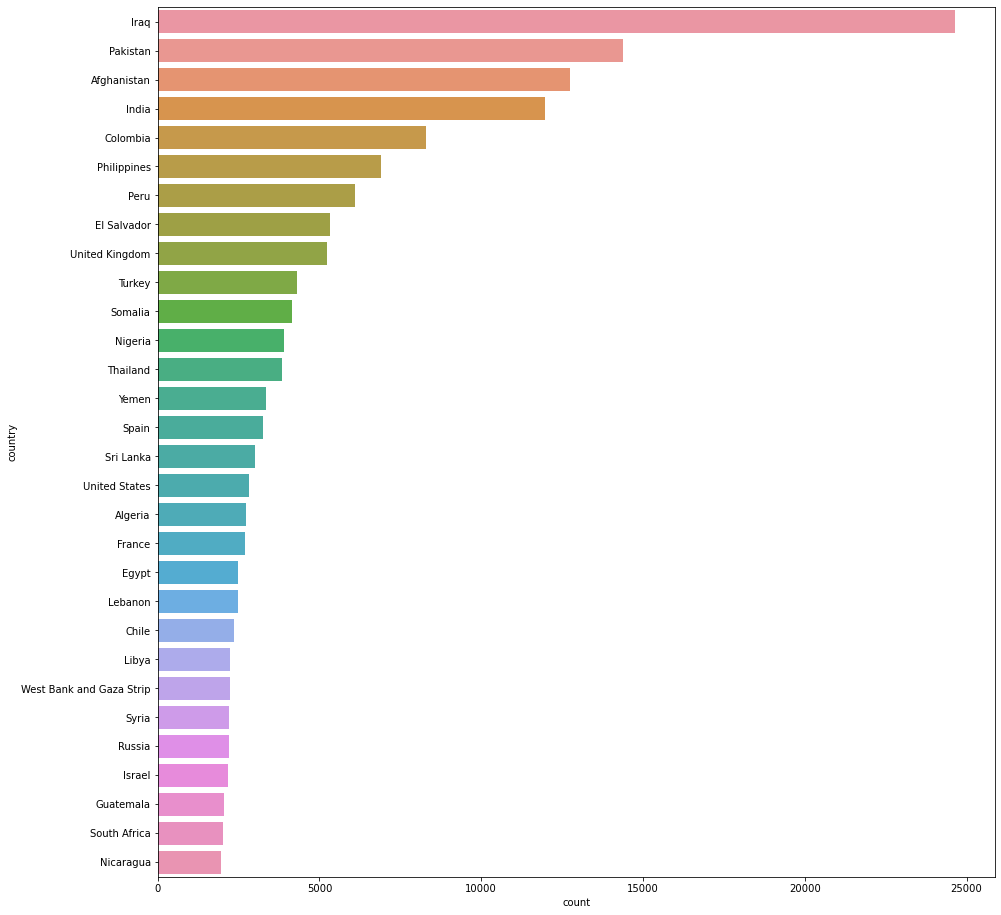

In [32]:
print('Top 30 terrorist attacked countries:')
plt.subplots(figsize = (15,16))
sns.barplot(data= df_country.iloc[0:30], x = 'count', y= 'country')

Insights:
1. Iraq has the highest number of terrorist attacks.
2. The top five hot zone countries are Iraq, Pakistan, Afghanistan, India, Colombia. 
3. Maximum no of attacks happened in 2014 followed by 2015, 2016, 2017 and 2013.
4. The major types of attack are Bombing/Explosion followed by Armed Assaul and Facility/Infrastructure attack.
5. The main target according to the data frame is Private Citzens & Property.
6. The two main types of weapons used for attacks are Explosives and Firearms.